# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [0]:
#Import all the necessary modules
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

%matplotlib inline 

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# reading the CSV file into pandas dataframe
pid_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/R3L1/pima-indians-diabetes.csv") 

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [76]:
pid_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Q2. Print 10 samples from the dataset

In [77]:
pid_df.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
575,1,119,44,47,63,35.5,0.280,25,0
547,4,131,68,21,166,33.1,0.160,28,0
520,2,68,70,32,66,25.0,0.187,25,0
738,2,99,60,17,160,36.6,0.453,21,0
54,7,150,66,42,342,34.7,0.718,42,0
233,4,122,68,0,0,35.0,0.394,29,0
52,5,88,66,21,23,24.4,0.342,30,0
235,4,171,72,0,0,43.6,0.479,26,1
185,7,194,68,28,0,35.9,0.745,41,1
397,0,131,66,40,0,34.3,0.196,22,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [78]:
# Data types
pid_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [79]:
pid_df.shape

(768, 9)

In [80]:
pid_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [81]:
# Check which all columns are having zeros
pid_df.eq(0).any()

# Not all columns can be replaces as there are columns which are having values as 0 or 1 i.e, yes or no

Preg      True
Plas      True
Pres      True
skin      True
test      True
mass      True
pedi     False
age      False
class     True
dtype: bool

cannot be zero: mass, skin, Pres,Plas

In [0]:
#Replacing the values of zero with median.. since this is integer we need to pass 0 as 0 instead of '0'
pid_df.Plas.replace(0,pid_df.Plas.median(), inplace=True)
pid_df.Pres.replace(0,pid_df.Pres.median(), inplace=True)
pid_df['skin'].replace(0,pid_df.skin.median(), inplace=True)
pid_df.mass.replace(0,pid_df.mass.median(), inplace=True)

# Check if any more zeros are not present by running eg command

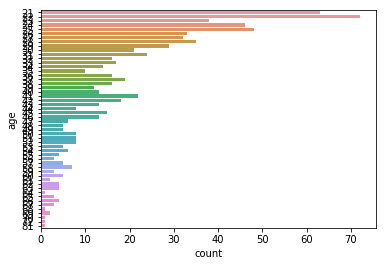

In [89]:
# While debugging I just checked for value counts
pid_df.age.value_counts()
sns.countplot(y='age', data=pid_df)

In [90]:
pid_df.Plas.median()
# Validated that median is coming correctly

117.0

# Q5 Print the descriptive statistics of each & every column using describe() function

In [91]:
pid_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [0]:
#1. All data is available with 768 count, none of the value is missing
#2. 

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [0]:
import seaborn as sns

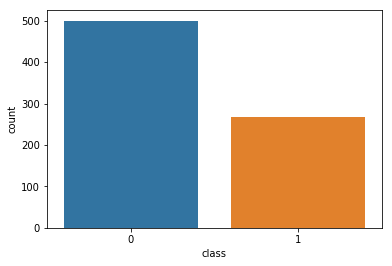

In [93]:
sns.countplot(x='class', data=pid_df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [94]:
pid_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

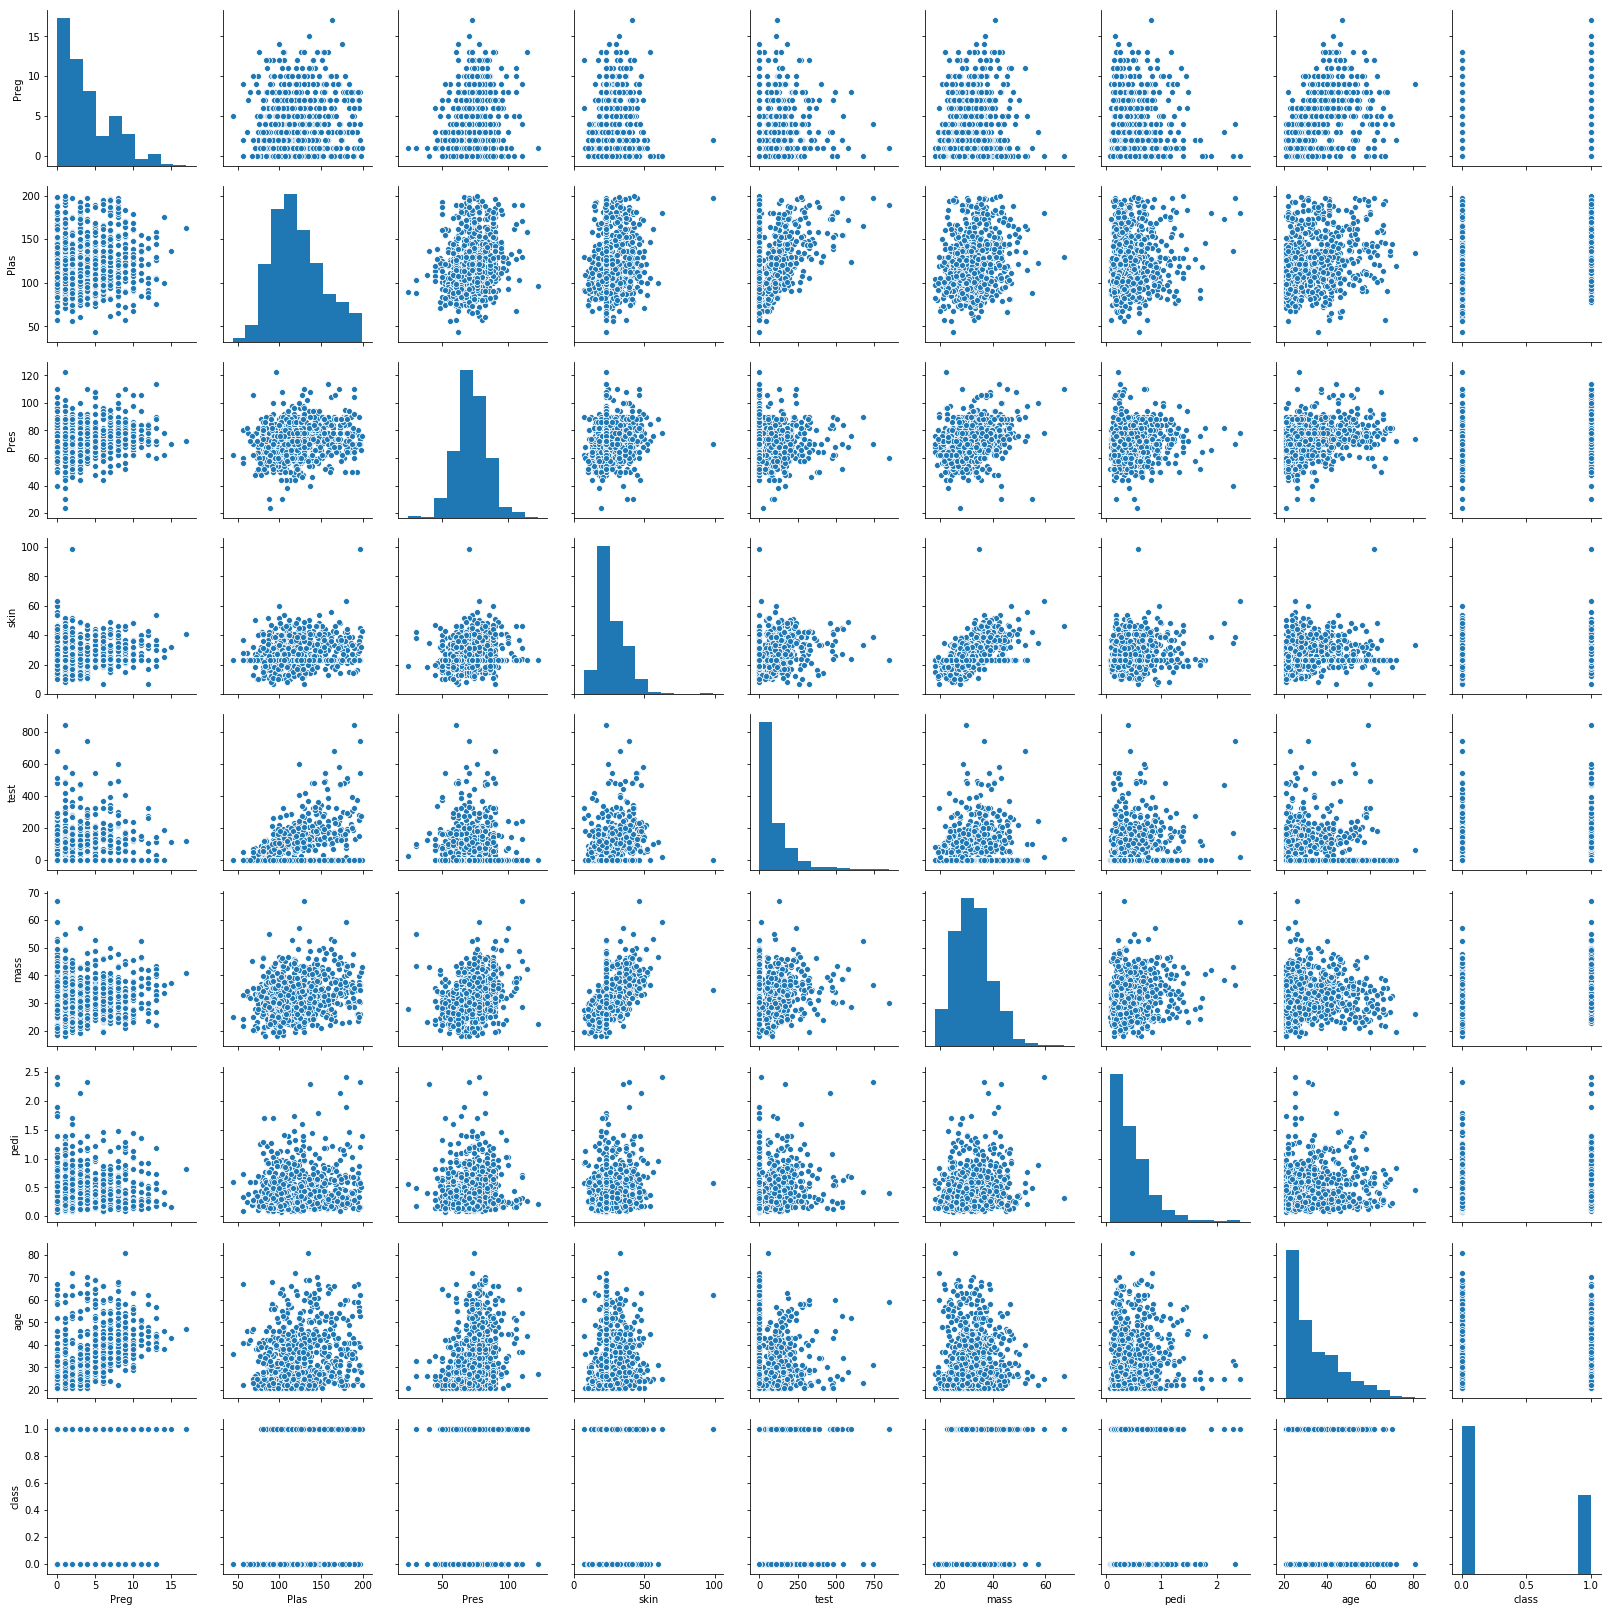

In [41]:
sns.pairplot(pid_df)
#hue="class"

In [95]:
pid_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.073535,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.331709,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.045769,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.244250,0.546951,0.142977,0.054514,0.189065
test,-0.073535,0.331709,-0.045769,0.244250,1.000000,0.185356,0.185071,-0.042163,0.130548
mass,0.021546,0.231400,0.281132,0.546951,0.185356,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.185071,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.042163,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.130548,0.312249,0.173844,0.238356,1.000000


In [0]:
# Few observations regarding the data
#1. Mass and Skin are linearly linked
#2. High plasma glucose and mass is mostly correlated to being diabtic
#3. Age is directly related to pregnancy, glucuse plasama and Blood pressure

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [0]:
X = pid_df.drop('class', axis=1)

In [0]:
y = pid_df[['class']]

In [0]:
from sklearn.model_selection import train_test_split
# Trainign and test data has been segrated with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [100]:
pid_model = DecisionTreeClassifier(criterion = 'entropy' )
pid_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
pid_predict=pid_model.predict(X_test)

In [0]:
from IPython.display import Image  
from sklearn import tree
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('/content/drive/My Drive/Colab Notebooks/R3L1/pima_tree.dot','w')
dot_data = tree.export_graphviz(pid_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

# Q10 Print the accuracy of the model & print the confusion matrix 

In [103]:
pid_model.score(X_test , y_test)

0.7359307359307359

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pid_predict)
print(confusion_matrix)

[[112  34]
 [ 27  58]]


In [0]:
# 34 females are predicted incorrectly as those have been predicted as Non Diabetic instead of being Diabetic

Print the feature importance of the decision model - Optional

In [105]:
print (pd.DataFrame(pid_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
Preg  0.102898
Plas  0.228752
Pres  0.134734
skin  0.049065
test  0.019622
mass  0.223455
pedi  0.108416
age   0.133057


In [0]:
# Mass and Plasma are the most important one